# Рубежный контроль 1 

Фильчиков Артём РТ5-61Б 

Вариант 19

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [4]:
data = pd.read_csv('C:/Users/artfi/ML\RK1/toy_dataset.csv', sep=",")
data.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


In [5]:
data.shape

(150000, 6)

In [6]:
# проверим есть ли пропущенные значения
data.isnull().sum()

Number     0
City       0
Gender     0
Age        0
Income     0
Illness    0
dtype: int64

# График Joinplot

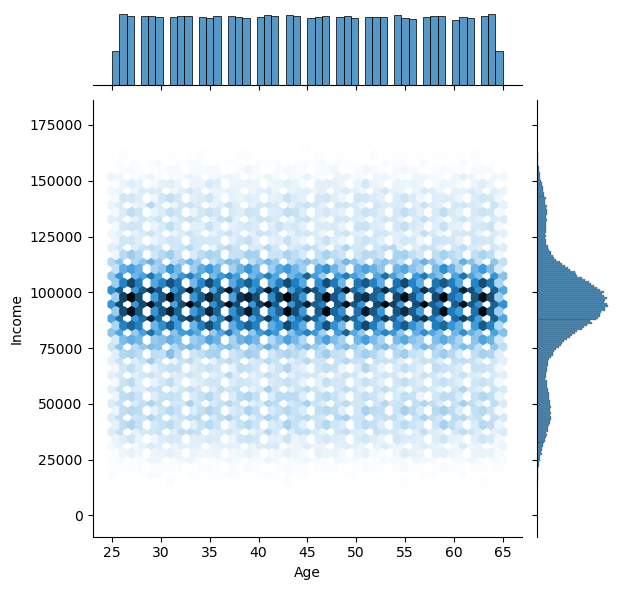

In [7]:
sns.jointplot(x='Age', y='Income', data=data, kind="hex")

# Масштабирование данных (для одного признака)

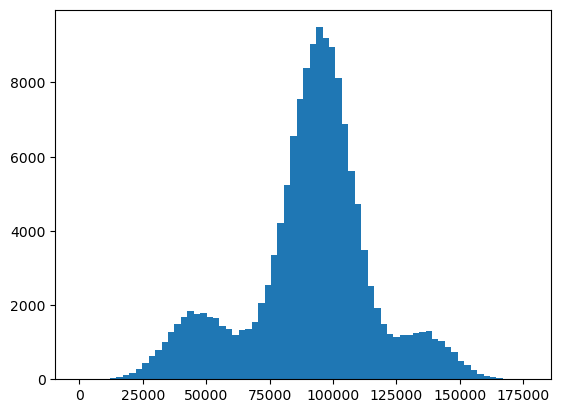

In [8]:
sc = MinMaxScaler()
sc_df = sc.fit_transform(data[['Income']])
plt.hist(data['Income'], 70)
plt.show()

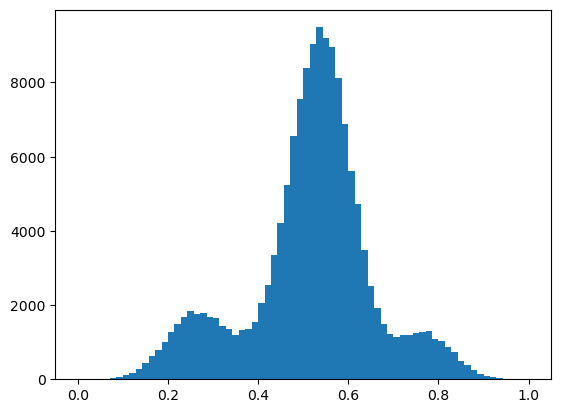

In [9]:
plt.hist(sc_df, 70)
plt.show()

# Преобразование категориальных признаков в количественные

Искусственно создадим категориальный признак на основе числового

In [11]:
cat_enc = pd.DataFrame({'c1':data["Gender"]})
cat_enc

,c1
0,Male
1,Male
2,Male
3,Male
4,Male
...,...
149995,Male
149996,Male
149997,Male
149998,Male


# Использование LabelEncoder

In [12]:
cat_enc['c1'].unique()

array(['Male', 'Female'], dtype=object)

In [13]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [14]:
le.classes_

array(['Female', 'Male'], dtype=object)

In [15]:
cat_enc_le

array([1, 1, 1, ..., 1, 1, 0])

In [17]:
le.inverse_transform([0, 1])

array(['Female', 'Male'], dtype=object)

# Использование one-hot encoding

In [18]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [19]:
cat_enc.shape

(150000, 1)

In [20]:
cat_enc_ohe.shape

(150000, 2)

In [21]:
cat_enc_ohe.todense()

matrix([[0., 1.],
        [0., 1.],
        [0., 1.],
        ...,
        [0., 1.],
        [0., 1.],
        [1., 0.]])

In [23]:
cat_enc.head(10)

,c1
0,Male
1,Male
2,Male
3,Male
4,Male
5,Female
6,Female
7,Male
8,Male
9,Female
